**ALL PLOTS OBJECTIVE 1**

In [1]:
# Add the root directory to the sys.path
import sys
import os
import json
import numpy as np
import matplotlib.pyplot as plt
base_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(base_dir, '../'))
sys.path.append(root_dir)
print(f"Root directory added to sys.path: {root_dir}")
from src.plots import plot_multiple_validation_curves

Root directory added to sys.path: c:\Users\Admin\Documents\GitHub\FederatedLearning


Plot 1 FedAVG

In [ ]:

# base_dir = os.path.abspath(os.path.join(os.getcwd(), "../results/plot_2"))
# # Paths to metrics and config files
# metrics_files = [
#     os.path.join(base_dir, "test_1_metrics.jsonl"),
#     os.path.join(base_dir, "test_2_metrics.jsonl"),
#     os.path.join(base_dir, "test_3_metrics.jsonl"),
#     os.path.join(base_dir, "test_4_metrics.jsonl"),
#     os.path.join(base_dir, "test_5_metrics.jsonl"),
#     os.path.join(base_dir, "test_6_metrics.jsonl")
# ]
# config_files = [
#     os.path.join(base_dir, "test_1_run_config.jsonl"),
#     os.path.join(base_dir, "test_2_run_config.jsonl"),
#     os.path.join(base_dir, "test_3_run_config.jsonl"),
#     os.path.join(base_dir, "test_4_run_config.jsonl"),
#     os.path.join(base_dir, "test_5_run_config.jsonl"),
#     os.path.join(base_dir, "test_6_run_config.jsonl"),
# ]


base_dir = os.path.abspath(os.path.join(os.getcwd(), "../results/Round_test/N8_B2_E5"))
# Paths to metrics and config files
metrics_files = os.path.join(base_dir, "metrics.jsonl")
config_files = os.path.join(base_dir, "run_config.jsonl")

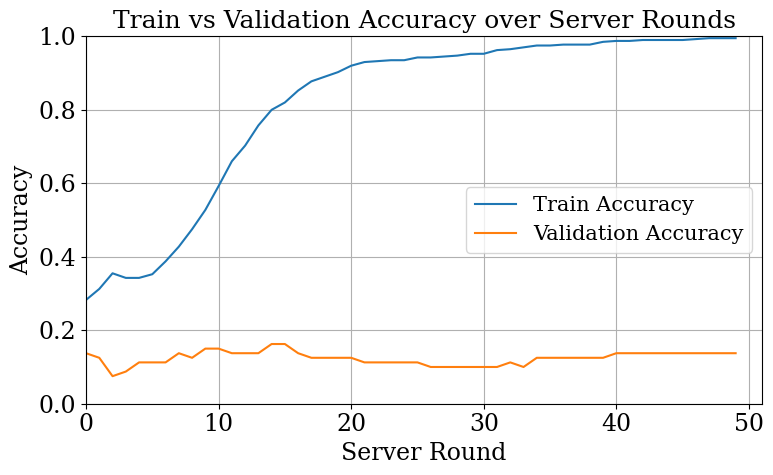

In [13]:

# Load metrics
train_accuracies = []
val_accuracies = []

with open(metrics_files, "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        data = json.loads(line)
        if "train_accuracy" in data:
            train_accuracies.append(data["train_accuracy"])
        elif "validation_accuracy" in data:
            val_accuracies.append(data["validation_accuracy"])

# Epochs based on number of training entries
epochs = list(range(0, len(train_accuracies)))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Train vs Validation Accuracy over Server Rounds')
plt.xlabel('Server Round')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlim(0, len(train_accuracies) + 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("train_val_accuracy_plot.pdf", format="pdf")
plt.show()

In [3]:

# Check if the files exist
for file in metrics_files + config_files:
    if not os.path.exists(file):
        print(f"File not found: {file}")
    else:
        print(f"File exists: {file}")

File not found: c
File not found: :
File exists: \
File not found: U
File not found: s
File not found: e
File not found: r
File not found: s
File exists: \
File not found: A
File not found: d
File not found: m
File not found: i
File not found: n
File exists: \
File not found: D
File not found: o
File not found: c
File not found: u
File not found: m
File not found: e
File not found: n
File not found: t
File not found: s
File exists: \
File not found: G
File not found: i
File not found: t
File not found: H
File not found: u
File not found: b
File exists: \
File not found: F
File not found: e
File not found: d
File not found: e
File not found: r
File not found: a
File not found: t
File not found: e
File not found: d
File not found: L
File not found: e
File not found: a
File not found: r
File not found: n
File not found: i
File not found: n
File not found: g
File exists: \
File not found: r
File not found: e
File not found: s
File not found: u
File not found: l
File not found: t
File not f

In [4]:
import os
print(f"Current working directory: {os.getcwd()}")

Current working directory: c:\Users\Admin\Documents\GitHub\FederatedLearning\notebooks


In [31]:
def plot_run_results(metrics_path: str, config_path: str) -> None:
    '''
    This function plots the training progress of a simulation
    '''
    train_loss, val_loss = [], []
    train_acc, val_acc = [], []

    # Read the metrics file
    with open(metrics_path, "r") as f:
        for line in f:
            data = json.loads(line)
            if "train_loss" in data:
                train_loss.append(data["train_loss"])
                train_acc.append(data["train_accuracy"])
            if "validation_loss" in data and "validation_accuracy" in data:
                val_loss.append(data["validation_loss"])
                val_acc.append(data["validation_accuracy"])

    # Debugging: Print lengths and values
    print(f"Rounds: {len(train_acc)}, Train Accuracy: {len(train_acc)}, Validation Accuracy: {len(val_acc)}")


    # Dynamically adjust rounds
    rounds = np.arange(0, len(train_acc) )

    # Plot accuracy and loss
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Accuracy Plot
    ax[0].plot(rounds, train_acc, label="Train Accuracy", linestyle="-")
    ax[0].plot(rounds[:len(val_acc)], val_acc, label="Validation Accuracy", linestyle="-")  # Match lengths
    ax[0].set_title("Training & Validation Accuracy per Round")
    ax[0].set_xlabel("Rounds")
    ax[0].set_xlim(0, 200)  # Set y-axis limits for accuracy
    ax[0].set_ylabel("Accuracy")
    ax[0].legend()

    # Loss Plot
    ax[1].plot(rounds, train_loss, label="Train Loss", linestyle="-")
    ax[1].plot(rounds, val_loss, label="Validation Loss", linestyle="-")  # Match lengths
    ax[1].set_title("Training & Validation Loss per Round")
    ax[1].set_xlabel("Rounds")
    ax[1].set_xlim(0, 200)  # Set y-axis limits for loss
    ax[1].set_ylabel("Loss")
    ax[1].legend()
    plt.subplots_adjust(hspace=0.5) 
    plt.savefig("plot2.pdf", format= "pdf")

Rounds: 200, Train Accuracy: 200, Validation Accuracy: 200


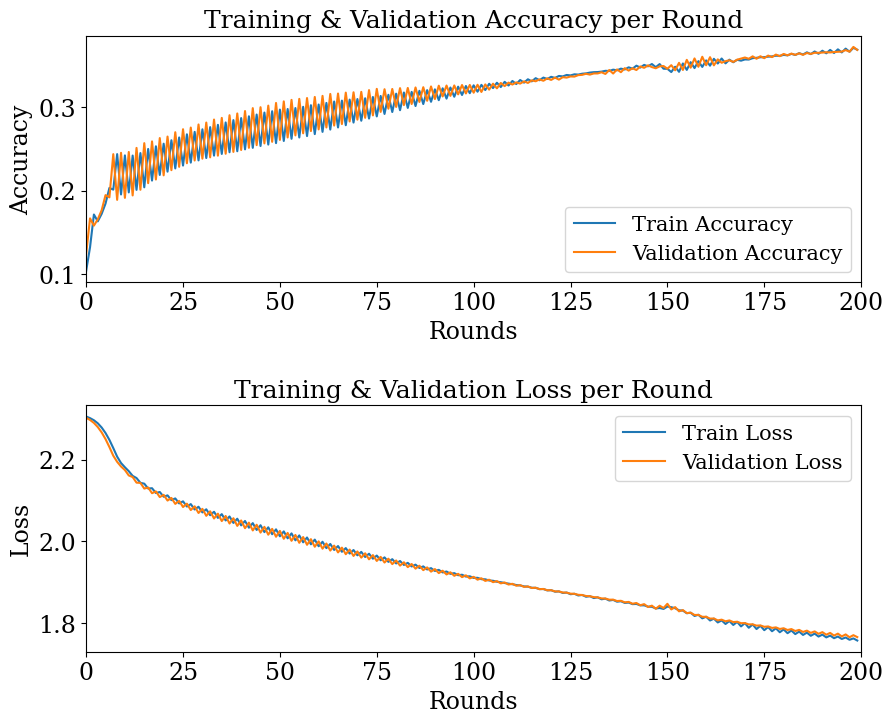

In [32]:
plot_run_results(metrics_files, config_files)

In [7]:
plot_multiple_validation_curves(metrics_files, config_files)

FileNotFoundError: [Errno 2] No such file or directory: 'c'

<Figure size 1000x600 with 0 Axes>